In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

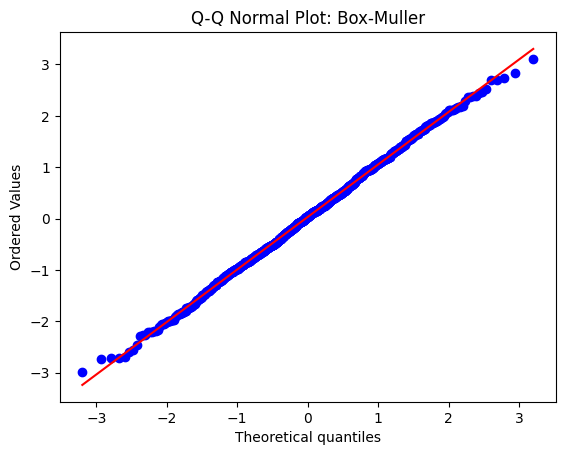

In [5]:
np.random.seed(42)\
# seed random generator for reproducability

u1, u2 = np.random.rand(1000), np.random.rand(1000) 
# u1 and u2 are now vectors of values from unif[0,1]

normals = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
# generate vectors of standard normals from Box-Muller method

stats.probplot(normals, dist='norm', plot=plt)
plt.title('Q-Q Normal Plot: Box-Muller')
plt.show()




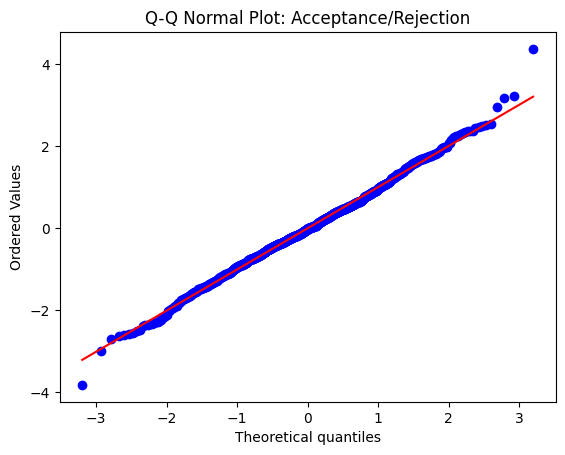

In [6]:
def getNormPdfVal(x):
    return (1/(np.sqrt(2 * np.pi))) * np.exp(-1/2 * (x ** 2))

def getStandardCauchy(x):
    return 1/(np.pi * (1 + (x ** 2)))

    
np.random.seed(132)
# seed for reproducability

normals = []
while len(normals) < 1000:
    x = np.random.standard_cauchy() # 1 sample from standard cauchy
    f = getNormPdfVal(x) # Z pdf
    c = getNormPdfVal(0) / getStandardCauchy(0) 
    cg = getStandardCauchy(x) * c # c * g(x)
    u = np.random.rand(1)[0]
    if u <= f / cg:
        normals.append(x)

normals = np.array(normals)

stats.probplot(normals, dist='norm', plot=plt)
plt.title('Q-Q Normal Plot: Acceptance/Rejection')
plt.show()


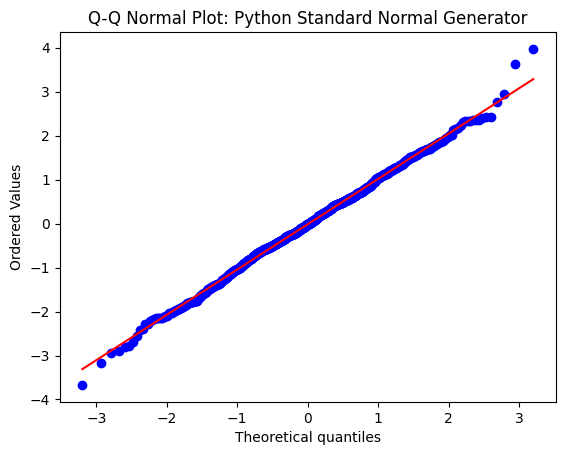

In [7]:
stats.probplot(np.random.randn(1000), dist='norm', plot=plt)
plt.title('Q-Q Normal Plot: Python Standard Normal Generator')
plt.show()

In [8]:
!pip install pandas
!pip install xlrd



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


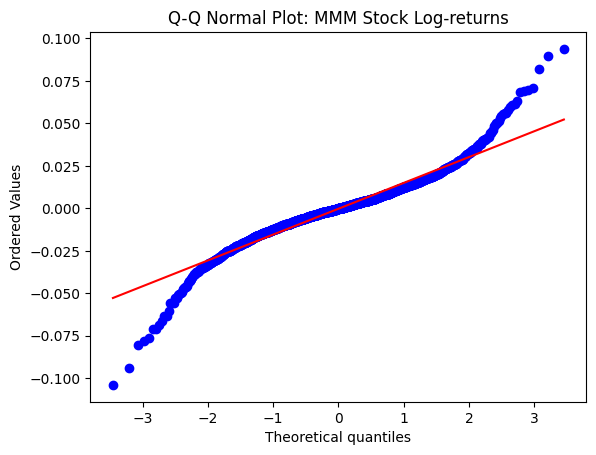

In [9]:
import pandas as pd

df = pd.read_excel('rogers_stock_data.xls')

df_mmm = df['MMM']

log_returns = []

for i in range(df_mmm.size):
    if i == df_mmm.size - 1:
        break
    log_returns.append(np.log(df_mmm[i+1]/df_mmm[i]))

stats.probplot(log_returns, dist='norm', plot=plt)
plt.title('Q-Q Normal Plot: MMM Stock Log-returns')
plt.show()

In [36]:
from itertools import islice
def computeBond(s_N, n, dp):
    if n == 1:
        dp[1] = 1 / (1 + s_N[n])
        return dp[1]
    if dp[n] != -1:
        return dp[n]
    else:
        bond = 1/(1+s_N[n])
        for i in range(1, n):
            bond -= s_N[n]/(s_N[n] + 1) * computeBond(s_N, i, dp) # mistake was not dividing by (s_N[n] + 1)
        dp[n] = bond
        return bond

s_N = [-1, 3.25/100, 3.75/100, 4/100, 4.25/100, 
            4.375/100, 4.5/100, 4.625/100, 4.75/100, 4.875/100, 5/100, 5.125/100, 5.25/100]
            
bonds = {}
for i in range (13):
    bonds[i] = -1

computeBond(s_N, 12, bonds)

for n, price in bonds.items():
    if (n == 0):
        continue
    print(f'b(0, {n}) = {price}')

print()

yields = [(1/price) ** (1/i) - 1 for (i, price) in islice(bonds.items(), 1, None)]
counter = 1
for y in yields:
    print(f'Y({counter}) = {y}')
    counter += 1 

b(0, 1) = 0.9685230024213075
b(0, 2) = 0.928848566177543
b(0, 3) = 0.8885626319769673
b(0, 4) = 0.845657358729523
b(0, 5) = 0.8058614316458839
b(0, 6) = 0.765851306609756
b(0, 7) = 0.7257798578139112
b(0, 8) = 0.6857933199233343
b(0, 9) = 0.6460307252245161
b(0, 10) = 0.6066234190227268
b(0, 11) = 0.5676946535061069
b(0, 12) = 0.529359259538995

Y(1) = 0.03249999999999997
Y(2) = 0.03759421682754671
Y(3) = 0.04016918799421432
Y(4) = 0.042800887013669575
Y(5) = 0.04411401624300981
Y(6) = 0.04546441970733284
Y(7) = 0.04685133851035306
Y(8) = 0.048276484765459315
Y(9) = 0.04974298405711619
Y(10) = 0.05125502019280703
Y(11) = 0.05281775315117132
Y(12) = 0.05443737306822438


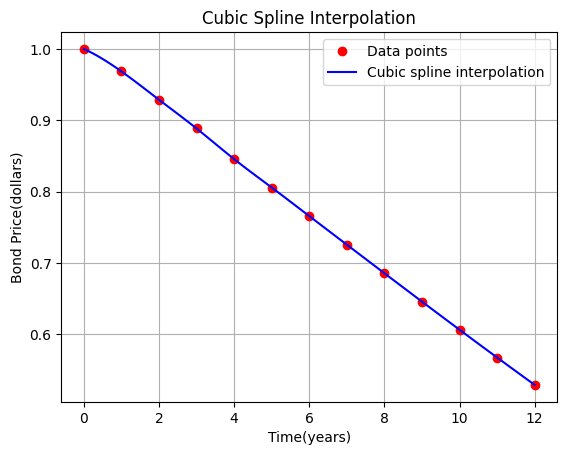

In [37]:
from scipy.interpolate import CubicSpline

x = np.array(range(0, 13))
bonds[0] = 1

prices = np.array([bonds[n] for n in range(0, 13)])



cs = CubicSpline(x, prices)

x_new = np.linspace(0, 12, 100)
y_new = cs(x_new)


plt.plot(x, prices, 'ro', label='Data points')  # Original data points as red circles
plt.plot(x_new, y_new, label='Cubic spline interpolation', color='b')  # Interpolation curve in blue
plt.legend()
plt.title('Cubic Spline Interpolation')
plt.xlabel('Time(years)')
plt.ylabel('Bond Price(dollars)')
plt.grid(True)
plt.show()


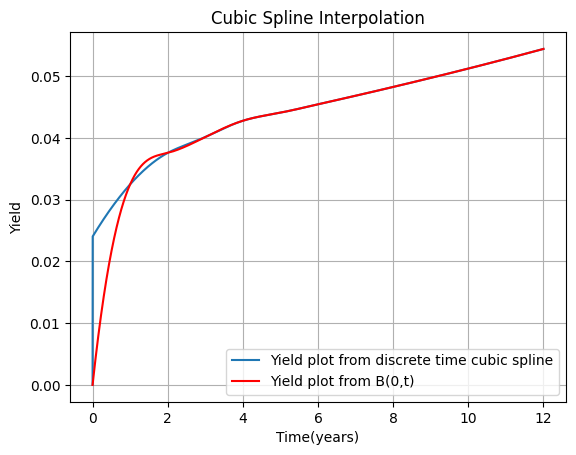

In [38]:
yields.insert(0, 0)

t1  = np.array(range(13))
t2 = np.linspace(1e-20, 12, 100000)
cs_yields = CubicSpline(t1, yields)
yields_interp = cs_yields(t2)




yields_cont = [(1/cs(n)) ** (1/n) - 1 for n in t2]


plt.plot(t2, yields_cont, label='Yield plot from discrete time cubic spline')
plt.plot(t2, yields_interp, color='r', label='Yield plot from B(0,t)')


plt.legend()
plt.title('Cubic Spline Interpolation')
plt.xlabel('Time(years)')
plt.ylabel('Yield')
plt.grid(True)
plt.show()